In [1]:
import pbjam as pb
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


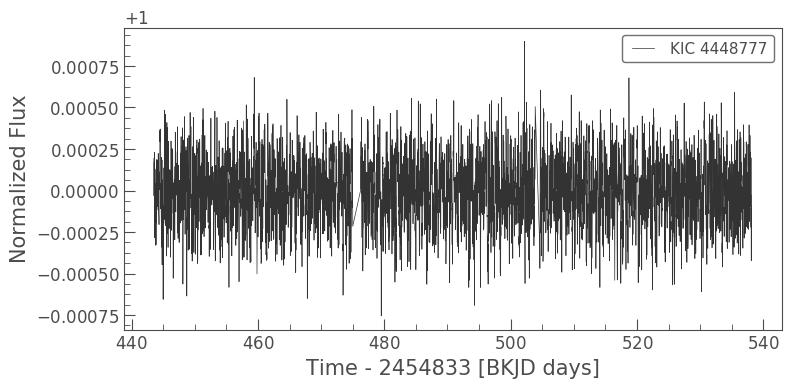

In [4]:
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

/home/oliver/.local/lib/python3.6/site-packages/lightkurve-1.0.0-py3.6.egg/lightkurve/periodogram.py:868: LightkurveWarning: `min_frequency` keyword is deprecated, please use `minimum_frequency` instead.
  LightkurveWarning)
/home/oliver/.local/lib/python3.6/site-packages/lightkurve-1.0.0-py3.6.egg/lightkurve/periodogram.py:873: LightkurveWarning: `max_frequency` keyword is deprecated, please use `maximum_frequency` instead.
  LightkurveWarning)


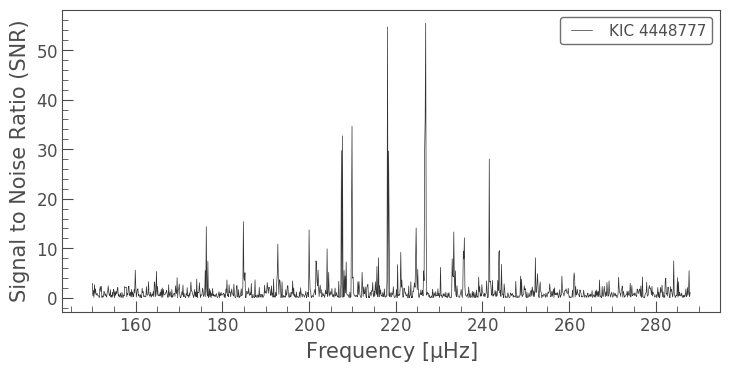

In [20]:
p = lc.to_periodogram(normalization='psd', 
                      maximum_frequency=288, minimum_frequency=150).flatten()
p.plot()

Epsilon from Vrard : (1.3781589243447712, 0.1)


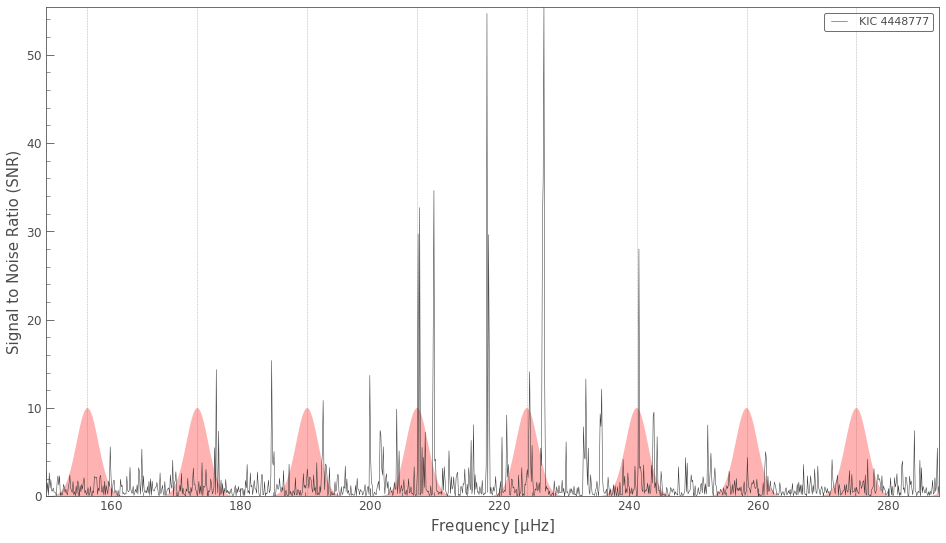

In [21]:
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')
ge_vrard.plot(dnu, numax, teff, p)

Epsilon from kde : [1.3330264094013642, 0.08977234298145105]


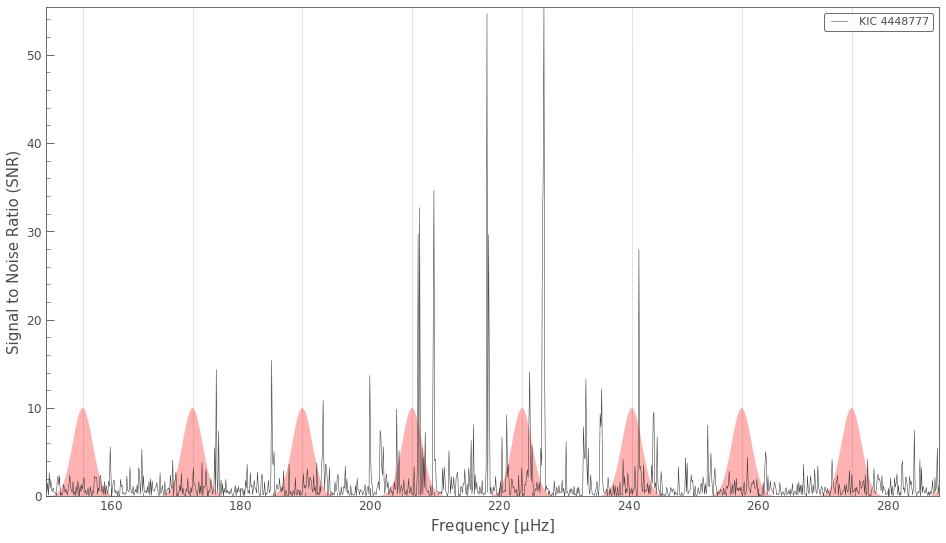

In [22]:
ge_kde = pb.epsilon(method='KDE')
ep_kde = ge_kde(dnu, numax, teff)
print(f'Epsilon from kde : {ep_kde}')
n = np.arange(8, 16, 1)
ge_kde.plot(dnu, numax, teff, p)

In [23]:
x0 = [numax[0], dnu[0], 0.1, ep_kde[0], 0.03, 30, numax[0]*0.2, -1.0, 2.6]
asy = pb.mcmc(p.frequency.value, p.power.value, x0)
samples = asy(x0)

Burningham
Sampling


In [24]:
print(np.mean(samples, axis=0))
print(np.std(samples, axis=0))

[ 2.27250870e+02  1.69996052e+01  1.30710225e-01  1.34182939e+00
  9.26292522e-03  2.66027118e+01  4.32940203e+01 -7.98423902e-01
  2.82395331e+00]
[5.98998402 0.02575782 0.00671364 0.01954456 0.01860069 6.13987535
 2.14937034 0.10205244 0.23531881]


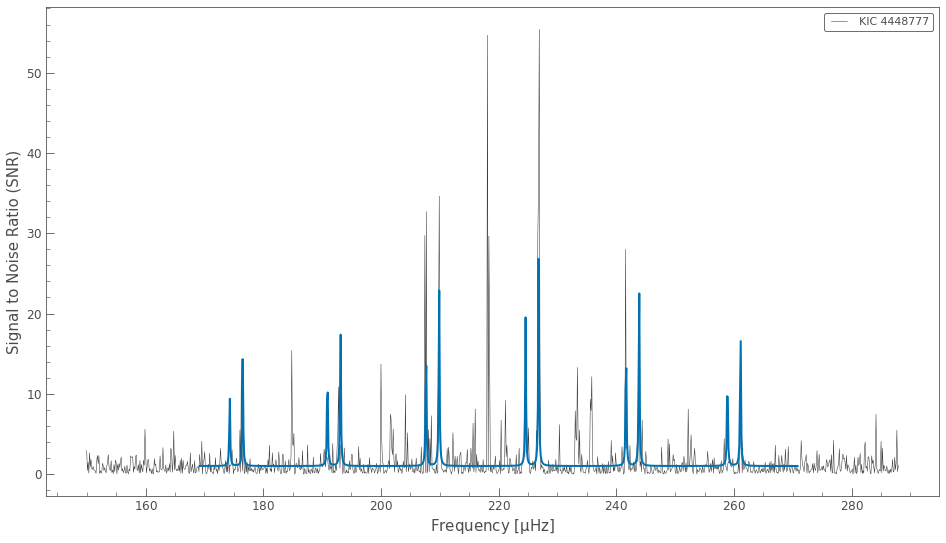

In [25]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
model = asy.model(np.mean(samples, axis=0)[:-1])
ax.plot(asy.f[asy.sel], model, linewidth=2)

In [30]:
import warnings
warnings.warn('test')

/home/oliver/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: test
  


In [29]:
np.median(p.power[0:100])

<Quantity 0.66997192>

In [39]:
p.frequency.values

AttributeError: 'Quantity' object has no 'values' member